### Please Insert your name in the below cell:

## Student Name:

# Assignment2 - Linear Regression

We will predict the price (`price` column) of an AirBNB listing using the features about the listing.

**Therefore, our unit of analysis is an AIRBNB LISTING**

# Setup (2.5 Points)

In [1]:
# Common imports (use seed value of 42)
import numpy as np
import pandas as pd
import random

np.random.seed(42)
random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Get the data (2.5 Points)

In [2]:
#We will predict the "price" value in the data set: (Import the dataset)
df = pd.read_csv('/Users/manishaanantharam/Downloads/airbnb.csv')
df.head()

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,guests_included,price_per_extra_person,minimum_nights,number_of_reviews,number_days_btw_first_last_review,review_scores_rating,cancellation_policy,price,price_gte_150,price_category
0,0,0,Roslindale,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,...,1,0,2,0,0,NaN,moderate,250,1,gte_226
1,0,1,Roslindale,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,...,0,0,2,36,804,94.0,moderate,65,0,lte_75
2,1,1,Roslindale,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,...,1,20,3,41,2574,98.0,moderate,65,0,lte_75
3,0,0,Roslindale,42.281106,-71.121021,House,Private room,4,1.0,1.0,...,2,25,1,1,0,100.0,moderate,75,0,lte_75
4,1,1,Roslindale,42.284512,-71.136258,House,Private room,2,1.5,1.0,...,1,0,2,29,380,99.0,flexible,79,0,btw_75-150


# Use Visualization and Statistics to gain some insight about your dataset (10 Points)

In [3]:
# Create a boxplot or histogram on the target variable and interpret your result in one paragraph

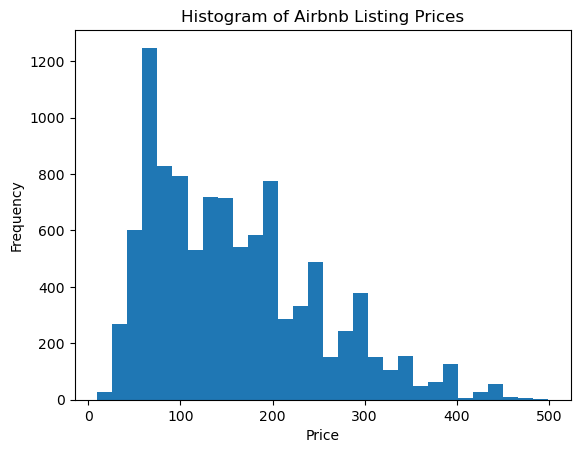

In [4]:
plt.hist(df["price"], bins=30)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Airbnb Listing Prices")
plt.show()

In [5]:
# Use statistic to take a look at the dataset. (use Mean, Median, Min, Max and Standard deviation)
mean_price = np.mean(df["price"])
median_price = np.median(df["price"])
min_price = np.min(df["price"])
max_price = np.max(df["price"])
std_price = np.std(df["price"])

# Print the results
print("Mean price:", mean_price)
print("Median price:", median_price)
print("Minimum price:", min_price)
print("Maximum price:", max_price)
print("Standard deviation of price:", std_price)

Mean price: 159.41617990654206
Median price: 147.0
Minimum price: 10
Maximum price: 499
Standard deviation of price: 90.79575187366464


# Split the data into train and test (70:30) (5 Points)

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.3)

### Be careful: we haven't seperated the target column yet

## Check the missing values (5 Points)

In [7]:
train_set.isna().sum()


host_is_superhost                       0
host_identity_verified                  0
neighbourhood_cleansed                  0
latitude                                0
longitude                               0
property_type                           8
room_type                               0
accommodates                            0
bathrooms                              19
bedrooms                               19
beds                                   16
bed_type                                0
Number of amenities                     0
guests_included                         0
price_per_extra_person                  0
minimum_nights                          0
number_of_reviews                       0
number_days_btw_first_last_review       0
review_scores_rating                 1609
cancellation_policy                     0
price                                   0
price_gte_150                           0
price_category                          0
dtype: int64

In [8]:
test_set.isna().sum()


host_is_superhost                      0
host_identity_verified                 0
neighbourhood_cleansed                 0
latitude                               0
longitude                              0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             17
bedrooms                              11
beds                                   8
bed_type                               0
Number of amenities                    0
guests_included                        0
price_per_extra_person                 0
minimum_nights                         0
number_of_reviews                      0
number_days_btw_first_last_review      0
review_scores_rating                 674
cancellation_policy                    0
price                                  0
price_gte_150                          0
price_category                         0
dtype: int64

# Data Prep (Import the functionalities and libraries that you need) (5 Points)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder

## Drop the variables we can't use in this tutorial (Our Target is the actual price not category)

In [10]:
# We can't use the following columns in this tutorial, because they are for classification task.
train = train_set.drop(['price_gte_150', 'price_category'], axis=1)
test = test_set.drop(['price_gte_150', 'price_category'], axis=1)

## Separate the target variable (we don't want to transform it)

In [11]:
# Remove the Target variable from your dataset
train_y = train[['price']]
test_y = test[['price']]

train_inputs = train.drop(['price'], axis=1)
test_inputs = test.drop(['price'], axis=1)

##  Identify the numerical and categorical columns (You can do it manually but You HAVE to write the automated code that was explained in class too). You need to seperate the binary columns as well. (For binary columns you can do it manually). (15 Points)

In [12]:
train_inputs.dtypes

host_is_superhost                      int64
host_identity_verified                 int64
neighbourhood_cleansed                object
latitude                             float64
longitude                            float64
property_type                         object
room_type                             object
accommodates                           int64
bathrooms                            float64
bedrooms                             float64
beds                                 float64
bed_type                              object
Number of amenities                    int64
guests_included                        int64
price_per_extra_person                 int64
minimum_nights                         int64
number_of_reviews                      int64
number_days_btw_first_last_review      int64
review_scores_rating                 float64
cancellation_policy                   object
dtype: object

In [13]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

In [14]:
# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes(include=['object']).columns.to_list()

In [15]:
# Identify the binary columns
binary_columns = ['host_is_superhost','host_identity_verified']

In [16]:
# Be careful: numerical columns already includes the binary columns,
# So, we need to remove the binary columns from numerical columns.
for col in binary_columns:
    numeric_columns.remove(col)

#### Check your data separately to make sure you have the right columns (Numeric, Categorical, and Binary)

In [17]:
binary_columns

['host_is_superhost', 'host_identity_verified']

In [18]:
numeric_columns

['latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'Number of amenities',
 'guests_included',
 'price_per_extra_person',
 'minimum_nights',
 'number_of_reviews',
 'number_days_btw_first_last_review',
 'review_scores_rating']

In [19]:
categorical_columns

['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

# Pipeline (20 Points)
### In this section you need to create and define the needed pipelines for each category of datatypes (Numeric, Categorical, and Binary).
#### You have deal with missing values and standardize the data where it is applicable.

In [20]:
#For Numeric values
numeric_trasformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [21]:
#For Categorical Values
categorical_trasformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot',OneHotEncoder(handle_unknown="ignore"))
])

In [22]:
#For Binary values
binary_trasformer = Pipeline(steps =[
    ('imputer',SimpleImputer(strategy='most_frequent', fill_value='unknown'))
])

### After defining your Pipeline you need to create the processor to actually transform your data

In [23]:
# Create the processor here
preprocessor = ColumnTransformer([
    ('num',numeric_trasformer,numeric_columns),
     ('cat',categorical_trasformer,categorical_columns),
    ('binary',binary_trasformer,binary_columns),
], remainder='passthrough')

# Transform: fit_transform() for TRAIN (5 Points)
### Use the processor to fit_transform your train dataset here. check your result's shape

In [24]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-2.10940159, -1.39824237,  1.20477863, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.61906783, -1.38593382, -1.16133947, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14448465, -0.16705969, -1.16133947, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82039585,  0.74441303, -0.56980994, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92762441,  0.3821493 , -0.56980994, ...,  0.        ,
         0.        ,  1.        ],
       [-0.34071414, -0.53929512, -1.16133947, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
train_x.shape

(7190, 61)

# Tranform: transform() for TEST (5 Points)
### Use the processor to transform your test dataset here. check your result's shape

In [26]:
# Transform the test data
test_x = preprocessor.transform(test_inputs)

test_x

array([[ 0.63069768,  0.40533687,  1.79630816, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.15153485,  0.27611111, -0.56980994, ...,  0.        ,
         0.        ,  1.        ],
       [-2.02789334, -0.91924215,  0.02171958, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.15906806, -0.38872897,  1.20477863, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.11838687, -0.56878308, -0.56980994, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94171792,  0.19283558, -1.16133947, ...,  0.        ,
         0.        ,  1.        ]])

In [27]:
test_x.shape

(3082, 61)

# Train a Linear Regression model. (10 Points)
### Import Linear Regression from Scikit learn library and use it to first fit your model and the check your accuracy

In [28]:
# Import linear regression and fit your model using train dataset
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_x,train_y)

LinearRegression()

#### Import mean_squared_error from Scikit learn and use it to evaluate your model once using train dataset and once using test dataset

In [29]:
# Import MSE
from sklearn.metrics import mean_squared_error

In [30]:
#use Train dataset and calculate the RMSE and print out the result
reg_train_pred = lin_reg.predict(train_x)

train_mse = mean_squared_error(train_y,reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 52.10760275498371


In [31]:
train_y.shape

(7190, 1)

In [32]:
#use Test dataset and calculate the RMSE and print out the result
#reg_test_pred = lin_reg.predict(test_x)

#test_mse = mean_squared_error(test_y,reg_test_pred)

#test_rmse = np.sqrt(test_mse)

#print('Test RMSE: {}' .format(test_rmse))

reg_test_pred = lin_reg.predict(test_x)
test_mse = mean_squared_error(test_y[:len(reg_test_pred)], reg_test_pred)
test_rmse = np.sqrt(test_mse)
print('Test RMSE: {}' .format(test_rmse))


Test RMSE: 53.25850637545255


# Final Results and the evaluation (15 Points)

In [33]:
# What was the final result of RMSE for Train dataset
The final result of RMSE for train dataset is 52.11

SyntaxError: invalid syntax (2584985452.py, line 2)

In [ ]:
# What was the final result of RMSE for Test dataset
The final result of RMSE for test dataset is 53.26

In [ ]:
# Write 2 paragraph about your understanding of this model.
# Is the model overfitted or underfitted
# How accurate do you think your model is

In [ ]:
# The above metioned values suggest that our model is slightly overfit, since that test set RMSE is only greater than 
# the trainset RMSE. overall our Linear regression model performs resonabily well at predicting the price of an airbnb 
# listing based on available features . however there is certaily room for improvemnet as the RMSE values are 
# reltively high.